In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
import datetime

In [1]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/10stocks_price.csv')

NameError: name 'pd' is not defined

In [3]:
df.head()

,date_gsheets,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
0,01/03/2012 16:00,58.75,35.07,10.32,77.68,38.31,186.30,39.73,60.33,18.36,28.08
1,01/04/2012 16:00,59.06,34.85,11.49,76.80,38.85,185.54,39.21,59.71,18.56,27.71
2,01/05/2012 16:00,59.72,34.69,11.33,76.93,39.50,184.66,38.94,59.42,18.55,27.12
3,01/06/2012 16:00,60.34,34.47,12.33,76.39,39.91,182.54,38.33,59.00,18.65,26.91
4,01/09/2012 16:00,60.25,34.47,14.03,76.29,39.75,181.59,38.37,59.18,18.86,27.25


In [4]:
df.describe()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,102.874380,41.119881,77.348801,130.578032,84.278529,172.739881,47.687641,73.481365,25.564983,185.623453
std,28.856614,2.915722,52.093716,29.738410,23.340639,21.860902,3.686156,7.579578,3.725205,97.668462
min,55.790000,33.490000,7.690000,76.290000,38.310000,117.850000,36.800000,56.420000,17.360000,22.790000
25%,78.440000,38.900000,34.220000,112.700000,64.020000,154.000000,45.560000,69.120000,23.190000,117.820000
50%,99.520000,41.170000,64.360000,134.140000,92.030000,173.480000,48.120000,73.780000,25.790000,207.830000
75%,119.250000,43.000000,110.100000,146.690000,104.030000,191.950000,50.030000,77.490000,28.630000,247.740000
max,176.420000,47.430000,202.680000,199.560000,121.690000,215.800000,56.530000,99.620000,32.930000,385.000000


In [5]:
# Exploring the datatypes, checking for NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_gsheets  1509 non-null   object 
 1   AAPL          1509 non-null   float64
 2   KO            1509 non-null   float64
 3   NFLX          1509 non-null   float64
 4   BRK.B         1509 non-null   float64
 5   DIS           1509 non-null   float64
 6   IBM           1509 non-null   float64
 7   VZ            1509 non-null   float64
 8   WMT           1509 non-null   float64
 9   GE            1509 non-null   float64
 10  TSLA          1509 non-null   float64
dtypes: float64(10), object(1)
memory usage: 129.8+ KB


In [6]:
# Set the date column as the index to apply formulas to the dataframe as a whole
df.set_index('date_gsheets', inplace=True)

In [7]:
df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
date_gsheets,,,,,,,,,,
01/03/2012 16:00,58.75,35.07,10.32,77.68,38.31,186.30,39.73,60.33,18.36,28.08
01/04/2012 16:00,59.06,34.85,11.49,76.80,38.85,185.54,39.21,59.71,18.56,27.71
01/05/2012 16:00,59.72,34.69,11.33,76.93,39.50,184.66,38.94,59.42,18.55,27.12
01/06/2012 16:00,60.34,34.47,12.33,76.39,39.91,182.54,38.33,59.00,18.65,26.91
01/09/2012 16:00,60.25,34.47,14.03,76.29,39.75,181.59,38.37,59.18,18.86,27.25


In [8]:
# Calculate returns for each stock, at each time
returns_df = df.pct_change(1)

In [9]:
# Create a vector of equal weights (\omega_1 = \omega_1 = ... = \omega_10)
num_stocks = 10
weights = [1 / num_stocks] * num_stocks

In [10]:
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [11]:
# Calculate the variance covariance matrix
vcv_matrix = returns_df.cov()

In [12]:
vcv_matrix

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
AAPL,0.000246,0.000028,0.000059,0.000044,0.000048,0.000048,0.000027,0.000029,0.000047,0.000094
KO,0.000028,0.000075,0.000026,0.000037,0.000037,0.000032,0.000033,0.000029,0.000035,0.000038
NFLX,0.000059,0.000026,0.001063,0.000054,0.000057,0.000046,0.000015,0.000035,0.000060,0.000230
BRK.B,0.000044,0.000037,0.000054,0.000080,0.000055,0.000050,0.000038,0.000032,0.000057,0.000060
DIS,0.000048,0.000037,0.000057,0.000055,0.000132,0.000045,0.000039,0.000034,0.000058,0.000080
IBM,0.000048,0.000032,0.000046,0.000050,0.000045,0.000132,0.000035,0.000028,0.000057,0.000065
VZ,0.000027,0.000033,0.000015,0.000038,0.000039,0.000035,0.000103,0.000032,0.000044,0.000034
WMT,0.000029,0.000029,0.000035,0.000032,0.000034,0.000028,0.000032,0.000115,0.000030,0.000036
GE,0.000047,0.000035,0.000060,0.000057,0.000058,0.000057,0.000044,0.000030,0.000136,0.000066
TSLA,0.000094,0.000038,0.000230,0.000060,0.000080,0.000065,0.000034,0.000036,0.000066,0.000931


In [13]:
# Calculate the variance of the 10 asset portfoio
var_p = np.dot(np.transpose(weights), np.dot(vcv_matrix, weights))

In [14]:
var_p

7.332673907420128e-05

In [15]:
# Calculate the total risk (standard deviation) of the 10 asset portfolio
sd_p = np.sqrt(var_p)

In [16]:
sd_p

0.008563103355338022

In [17]:
# Calculate the Annualised Standard Deviation of the 10 asset portfolio
sd_p_annual = sd_p * np.sqrt(250)

In [18]:
sd_p_annual

0.13539455221149158

In [19]:
# Compare the Portfolio Risk with the individual risks of each security
individual_risks = np.std(returns_df) * np.sqrt(250)

In [20]:
individual_risks

AAPL     0.248003
KO       0.137257
NFLX     0.515302
BRK.B    0.141030
DIS      0.181313
IBM      0.181705
VZ       0.160220
WMT      0.169281
GE       0.184478
TSLA     0.482230
dtype: float64

Reducing Risk by Diversification

In [21]:
# Import package dependencies
import pandas as pd  # for data management and analysis
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for making charts look good
sns.set()  # implementing the seaborn plotting templates / themes

In [22]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/10stocks_price.csv')  # stock price data
df.set_index('date_gsheets', inplace=True)

# Calculate returns for each stock
returns_df = df.pct_change(1)

In [23]:
returns_df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
date_gsheets,,,,,,,,,,
01/03/2012 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/04/2012 16:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177
01/05/2012 16:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292
01/06/2012 16:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743
01/09/2012 16:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635


In [24]:
# Estimating the risk of a 10 asset portfolio
num_stocks = 10
weights = [1 / num_stocks] * num_stocks  # vector (list) of weights
vcv_matrix = returns_df.cov()  # variance covariance matrix

# Calculate variance and standard deviation of the 10 asset portfolio
var_portfolio = np.dot(np.transpose(weights), np.dot(vcv_matrix, weights))
sd_portfolio = np.sqrt(var_portfolio)
sd_portfolio_annual = sd_portfolio * np.sqrt(250)

# Estimate individual stock risks for comparison
individual_risks = np.std(returns_df) * np.sqrt(250)

In [25]:
# Extract a list of all the tickers in the dataframe
tickers = list(returns_df.columns)

In [26]:
# Exploring results using index slicing
tickers[0:2]

['AAPL', 'KO']

In [27]:
# Create 10 portfolios with each ensuing portfolio comprising of ONE additional stock.
portfolios = []

for i in range(1, len(tickers) + 1):
    portfolios.append(tickers[0:i])

In [28]:
portfolios

[['AAPL'],
 ['AAPL', 'KO'],
 ['AAPL', 'KO', 'NFLX'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT', 'GE'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT', 'GE', 'TSLA']]

In [29]:
# Calculate the risk of each portfolio
portfolio_risks = []

for port in portfolios:
    df = returns_df[port]
    
    num_stocks = len(df.columns)
    weights = [1 / num_stocks] * num_stocks
    vcv_p = df.cov()
    
    var_p = np.dot(np.transpose(weights), np.dot(vcv_p, weights))
    sd_p = np.sqrt(var_p)
    sd_p_annual = sd_p * np.sqrt(250)
    
    portfolio_risks.append(sd_p_annual)

In [30]:
portfolio_risks

[0.24808505375568835,
 0.1536167740652437,
 0.21145655417390294,
 0.17491660730394223,
 0.15759159863421662,
 0.14571266561387228,
 0.13422929292622485,
 0.1262813443034354,
 0.12416648815658816,
 0.13539455221149158]

In [31]:
# Create a dataframe of all the portfolio risks
risks_df = pd.DataFrame(portfolio_risks)

In [32]:
risks_df.rename(columns={risks_df.columns[0] : 'total_risk'}, inplace=True)

In [33]:
risks_df

,total_risk
0,0.248085
1,0.153617
2,0.211457
3,0.174917
4,0.157592
5,0.145713
6,0.134229
7,0.126281
8,0.124166
9,0.135395


<Axes: >

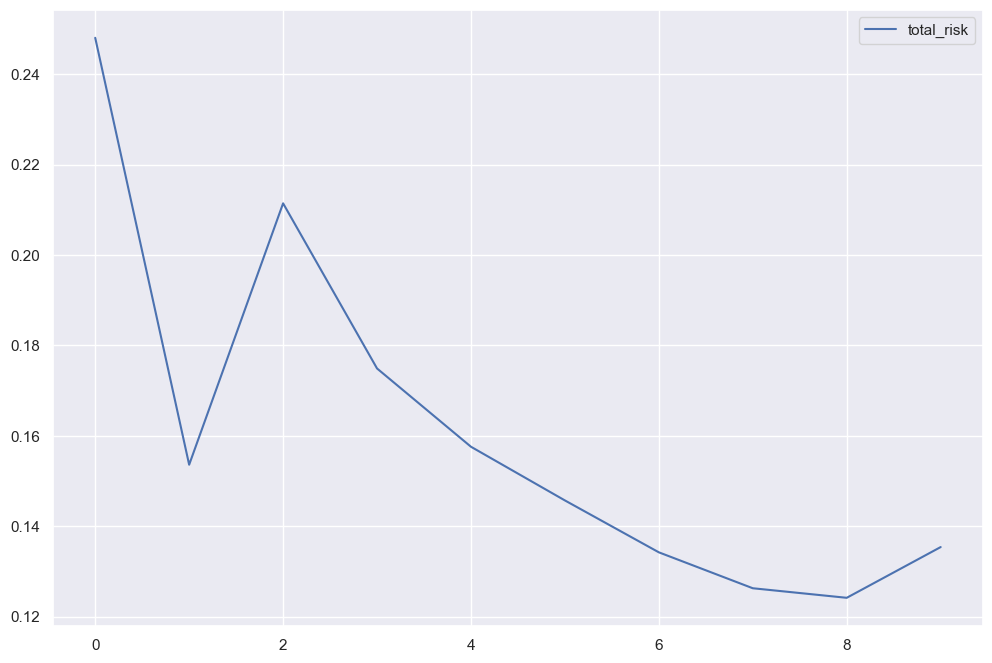

In [34]:
# Plot the portfolio risk of each of the 10 portfolios
risks_df.plot(figsize=(12, 8))

In [35]:
# Compare the risk of portfolios with the risk of individual securities
np.std(returns_df) * np.sqrt(250)

AAPL     0.248003
KO       0.137257
NFLX     0.515302
BRK.B    0.141030
DIS      0.181313
IBM      0.181705
VZ       0.160220
WMT      0.169281
GE       0.184478
TSLA     0.482230
dtype: float64

Reducing Risk by Diversification - Number of Securities to Hold

In [36]:
# Import package dependencies
import pandas as pd  # for data management and analysis
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for making charts look good
sns.set()  # implementing the seaborn plotting templates / themes

In [37]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/15stocks_price.csv')  # stock price data

df.set_index('date_gsheets', inplace=True)

# Calculate returns for each stock
returns_df = df.pct_change(1)

In [38]:
# Estimating the risk of a 15 asset portfolio
num_stocks = 15
weights = [1 / num_stocks] * num_stocks  # vector (list) of weights
vcv_matrix = returns_df.cov()  # variance covariance matrix

# Calculate variance and standard deviation of the 10 asset portfolio
var_portfolio = np.dot(np.transpose(weights), np.dot(vcv_matrix, weights))
sd_portfolio = np.sqrt(var_portfolio)
sd_portfolio_annual = sd_portfolio * np.sqrt(250)

# Estimate individual stock risks for comparison
individual_risks = np.std(returns_df) * np.sqrt(250)

In [39]:
returns_df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
date_gsheets,,,,,,,,,,,,,,,
01/03/2012 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/04/2012 16:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177,-0.032845,-0.008490,0.023534,-0.013459,-0.017864
01/05/2012 16:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292,-0.010946,0.000563,0.010219,0.001161,0.007513
01/06/2012 16:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743,-0.026958,0.028152,0.015535,-0.035373,-0.011774
01/09/2012 16:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635,0.008457,-0.022178,-0.013163,0.013526,-0.007943


In [40]:
tickers = list(returns_df.columns)
portfolios = []

for i in range(1, len(tickers) + 1):
    portfolios.append(tickers[0:i])

In [41]:
# Calculate the risk of each portfolio
portfolio_risks = []

for port in portfolios:
    df = returns_df[port]
    
    num_stocks = len(df.columns)
    weights = [1 / num_stocks] * num_stocks
    vcv_p = df.cov()
    
    var_p = np.dot(np.transpose(weights), np.dot(vcv_p, weights))
    sd_p = np.sqrt(var_p)
    sd_p_annual = sd_p * np.sqrt(250)
    
    portfolio_risks.append(sd_p_annual)

In [42]:
risks_df = pd.DataFrame(portfolio_risks)

In [43]:
risks_df.rename(columns={risks_df.columns[0] : 'total_risk'}, inplace=True)

In [44]:
risks_df.reset_index(inplace=True)
risks_df.rename(columns={'index' : 'num_securities'}, inplace=True)
risks_df['num_securities'] += 1
risks_df.set_index('num_securities', inplace=True)

In [45]:
risks_df

,total_risk
num_securities,
1,0.248085
2,0.153617
3,0.211457
4,0.174917
5,0.157592
6,0.145713
7,0.134229
8,0.126281
9,0.124166


C:\Users\Anna Mae Gaor\AppData\Local\Temp\ipykernel_4676\4117416110.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


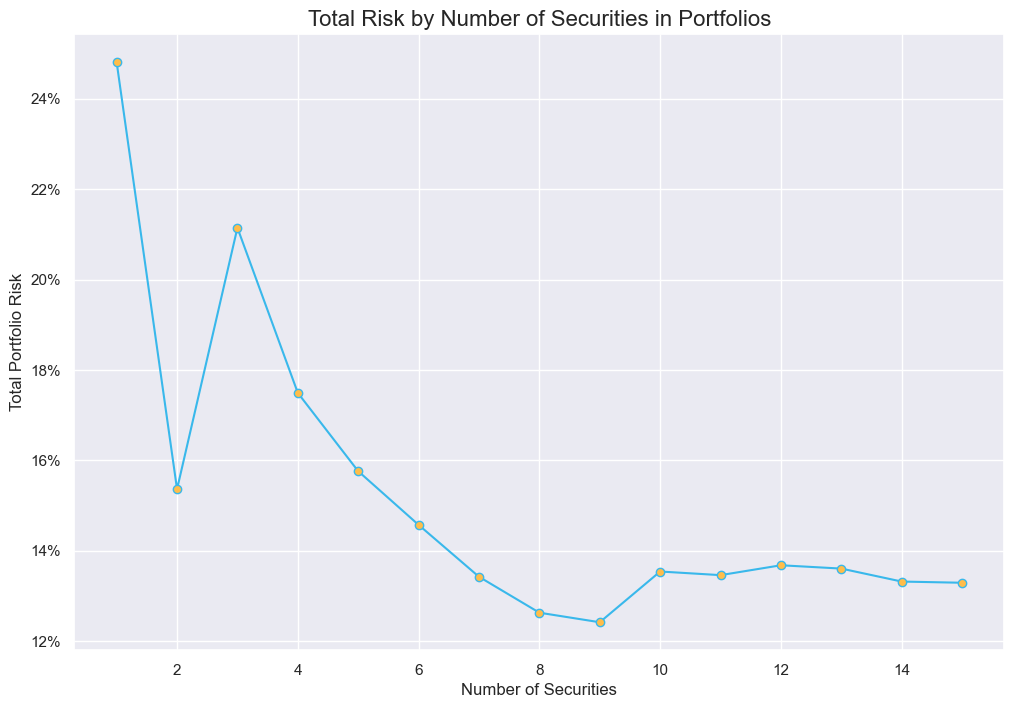

In [46]:
plt.figure(figsize=(12, 8))
plt.title('Total Risk by Number of Securities in Portfolios', fontsize=16)
plt.plot(risks_df, marker='o', color='#39b8eb', markerfacecolor='#ffbd4a')
plt.xlabel('Number of Securities')
plt.ylabel('Total Portfolio Risk')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.savefig('reducingRisk_byDiversification_plot.png')

# Reducing Risk by Diversification - Number of Securities to Hold

In [47]:
import pandas as pd

brk_portfolio = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/brk_portfolio - Copy.csv')

In [48]:
sorted_by_weights = brk_portfolio.sort_values(by='weights', ascending=False)
sorted_by_weights['cumulative_weights'] = sorted_by_weights['weights'].cumsum()

In [49]:
sorted_by_weights

,company,symbol,holdings,mkt_price,value,weights,cumulative_weights
4,Apple Inc,AAPL,905560000,178.67,161796405200,0.429306,0.429306
6,Bank of America Corp,BAC,1032852006,36.75,37957311221,0.100715,0.530021
2,American Express Company,AXP,151610700,227.91,34553594637,0.091684,0.621704
12,Coca-Cola Co,KO,400000000,60.75,24300000000,0.064477,0.686181
10,Chevron Corp,CVX,126093326,154.55,19487723533,0.051708,0.737890
37,Occidental Petroleum Corp,OXY,248018128,63.79,15821076385,0.041979,0.779869
19,Kraft Heinz Co,KHC,325634818,35.35,11511190816,0.030543,0.810412
34,Moody’s Corp,MCO,24669778,390.21,9626394073,0.025542,0.835955
32,Mitsubishi Corp,8058:TYO,358492800,23.52,8430990235,0.022371,0.858325
33,Mitsui & Co,8031:TYO,125022300,47.08,5885486660,0.015616,0.873942


# Optimising Portfolio Weights - Achieving a Target Return

In [50]:
# Import package dependencies
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [51]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/15stocks_price.csv')
df.set_index('date_gsheets', inplace=True)

In [52]:
df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
date_gsheets,,,,,,,,,,,,,,,
01/03/2012 16:00,58.75,35.07,10.32,77.68,38.31,186.30,39.73,60.33,18.36,28.08,36.84,179.03,26.77,34.92,25.75
01/04/2012 16:00,59.06,34.85,11.49,76.80,38.85,185.54,39.21,59.71,18.56,27.71,35.63,177.51,27.40,34.45,25.29
01/05/2012 16:00,59.72,34.69,11.33,76.93,39.50,184.66,38.94,59.42,18.55,27.12,35.24,177.61,27.68,34.49,25.48
01/06/2012 16:00,60.34,34.47,12.33,76.39,39.91,182.54,38.33,59.00,18.65,26.91,34.29,182.61,28.11,33.27,25.18
01/09/2012 16:00,60.25,34.47,14.03,76.29,39.75,181.59,38.37,59.18,18.86,27.25,34.58,178.56,27.74,33.72,24.98


In [53]:
returns_df = df.pct_change(1).dropna()

In [54]:
returns_df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
date_gsheets,,,,,,,,,,,,,,,
01/04/2012 16:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177,-0.032845,-0.008490,0.023534,-0.013459,-0.017864
01/05/2012 16:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292,-0.010946,0.000563,0.010219,0.001161,0.007513
01/06/2012 16:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743,-0.026958,0.028152,0.015535,-0.035373,-0.011774
01/09/2012 16:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635,0.008457,-0.022178,-0.013163,0.013526,-0.007943
01/10/2012 16:00,0.003485,0.005802,-0.024234,0.014812,-0.003019,-0.001542,0.005212,-0.002366,-0.007423,0.013578,0.008676,0.004368,0.003605,0.005635,-0.001201


In [55]:
returns_df.mean()

AAPL     0.000825
KO       0.000216
NFLX     0.002453
BRK.B    0.000661
DIS      0.000750
IBM     -0.000062
VZ       0.000242
WMT      0.000384
GE       0.000034
TSLA     0.002057
MA       0.001020
AMZN     0.001416
MSFT     0.000868
UN       0.000388
V        0.001068
dtype: float64

# Creating the Objective Function

In [56]:
def getPortReturn(weights):
    """
    Returns the Annualised Expected Return of a portfolio.
    Annualises the return using the 'crude' method.
    """
    exp_ret_portfolio = np.dot(np.transpose(weights), returns_df.mean()) * 250
    
    return exp_ret_portfolio

In [57]:
# Create a vector of equal weights as the initial (init) guess
num_stocks = len(returns_df.columns)
init_weights = [1 / num_stocks] * num_stocks

In [58]:
# Calculate the expected return on the portfolio of equal weights
getPortReturn(init_weights)

0.205351279050816

In [59]:
# Set a target return
target_return = 0.4

In [60]:
# Create the constraint that the weight of any asset i must be between 0 and 1 inclusive.
bounds = tuple((0, 1) for i in range(num_stocks))

In [61]:
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [62]:
# Setup the other 2 constraints
cons = (
    # Sum of weights must equate to 1
    {'type' : 'eq', 'fun' : lambda w : np.sum(w) - 1},
    
    # Difference between expected return and target must be equal to 0.
    {'type' : 'eq', 'fun' : lambda x : x.dot(returns_df.mean()) * 250 - target_return})

In [63]:
results = minimize(fun=getPortReturn,  # being the objective function
                   x0=init_weights,  # being the initial guess
                   # bounds: being the constraint that the weight of any asset i
                   # must be between 0 and 1 inclusive
                   bounds=bounds,
                   constraints=cons)  # being the other 2 constraints (see 'cons' in In[13])

In [64]:
results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.3999999999748798
       x: [ 6.011e-02  0.000e+00 ...  7.584e-03  8.939e-02]
     nit: 2
     jac: [ 2.063e-01  5.398e-02 ...  9.711e-02  2.671e-01]
    nfev: 32
    njev: 2

In [65]:
# Test the output by passing in the optimised weights into getPortReturn()
getPortReturn(weights=results['x'])

0.3999999999748798

In [66]:
# Store the optimised weights as a dataframe object
optimised_weights = pd.DataFrame(results['x'])

In [67]:
optimised_weights

,0
0,0.060112
1,0.000000
2,0.255945
3,0.040388
4,0.051134
5,0.000000
6,0.000000
7,0.007051
8,0.000000
9,0.208355


In [68]:
# Set the tickers as the index of `optimised_weights` by using the column names of `returns_df`.
optimised_weights.index = returns_df.columns

In [69]:
optimised_weights

,0
AAPL,0.060112
KO,0.000000
NFLX,0.255945
BRK.B,0.040388
DIS,0.051134
IBM,0.000000
VZ,0.000000
WMT,0.007051
GE,0.000000
TSLA,0.208355


# Minimising Portfolio Risk - Multiple Assets - Applied

In [70]:
# Import package dependencies
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [71]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/15stocks_price.csv')  # stock price data

df.set_index('date_gsheets', inplace=True)

In [72]:
def getPortRisk(weights):
    
    '''Returns the annualised standard deviation of a k asset portfolio.'''

    returns_df = df.pct_change(1).dropna()  # estimate returns for each asset
    num_stocks = len(returns_df.columns)  # number of stocks based on number of columns (excluding index col)
                                          # this is a local variable
        
    vcv = returns_df.cov()  # being the variance covariance matrix
    
    var_p = np.dot(np.transpose(weights), np.dot(vcv, weights))  # variance of the multi-asset portfolio
    sd_p = np.sqrt(var_p)  # standard deviation of the multi-asset portfolio
    sd_p_annual = sd_p * np.sqrt(250)  # annualised standard deviation of the multi-asset portfolio
    
    return sd_p_annual

In [73]:
num_stocks = len(df.columns)  # being the number of stocks (this is a 'global' variable)
init_weights = [1 / num_stocks] * num_stocks  # initialise weights (x0)

In [74]:
# Constraint that weights in any asset j must be between 0 and 1 inclusive
bounds = tuple((0, 1) for i in range(num_stocks))

In [75]:
# Constraint that the sum of the weights of all assets must equate to 1
cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})

In [76]:
results = minimize(fun=getPortRisk, x0=init_weights, bounds=bounds, constraints=cons)

In [77]:
results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.1059347936948761
       x: [ 4.798e-02  2.807e-01 ...  4.316e-02  1.247e-02]
     nit: 11
     jac: [ 1.060e-01  1.059e-01 ...  1.059e-01  1.063e-01]
    nfev: 176
    njev: 11

In [78]:
# Check total risk of the equal weighted portfolio
getPortRisk(init_weights)

0.13290599867193698

In [79]:
# Explore optimised weights
optimised_weights = pd.DataFrame(results['x'])
optimised_weights.index = df.columns
optimised_weights.rename(columns={optimised_weights.columns[0] : 'weights'}, inplace=True)

In [80]:
optimised_weights

,weights
AAPL,4.797982e-02
KO,2.807425e-01
NFLX,7.531062e-03
BRK.B,1.292948e-01
DIS,3.542576e-02
IBM,8.404580e-02
VZ,1.628310e-01
WMT,1.728683e-01
GE,2.008729e-02
TSLA,0.000000e+00


In [81]:
# Clean format of the weights so it's more readable
optimised_weights['weights_rounded'] = optimised_weights['weights'].apply(lambda x : round(x, 3))

In [82]:
optimised_weights

,weights,weights_rounded
AAPL,4.797982e-02,0.048
KO,2.807425e-01,0.281
NFLX,7.531062e-03,0.008
BRK.B,1.292948e-01,0.129
DIS,3.542576e-02,0.035
IBM,8.404580e-02,0.084
VZ,1.628310e-01,0.163
WMT,1.728683e-01,0.173
GE,2.008729e-02,0.020
TSLA,0.000000e+00,0.000


In [83]:
# Notice how 7 of the 15 stocks make up 92.1% of the portfolio allocation!
optimised_weights['weights_rounded'].sort_values(ascending=False).cumsum()

KO       0.281
WMT      0.454
VZ       0.617
BRK.B    0.746
IBM      0.830
AAPL     0.878
UN       0.921
DIS      0.956
GE       0.976
V        0.988
NFLX     0.996
AMZN     1.000
TSLA     1.000
MA       1.000
MSFT     1.000
Name: weights_rounded, dtype: float64

# Estimating Correlation - Applied

In [84]:
# Import packages
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/15stocks_price.csv')  # stock price data

df.set_index('date_gsheets', inplace=True)

# Calculate returns for all securities
returns_df = df.pct_change(1)

# Drop / delete missing observations
returns_df.dropna(inplace=True)

In [86]:
returns_df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
date_gsheets,,,,,,,,,,,,,,,
01/04/2012 16:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177,-0.032845,-0.008490,0.023534,-0.013459,-0.017864
01/05/2012 16:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292,-0.010946,0.000563,0.010219,0.001161,0.007513
01/06/2012 16:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743,-0.026958,0.028152,0.015535,-0.035373,-0.011774
01/09/2012 16:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635,0.008457,-0.022178,-0.013163,0.013526,-0.007943
01/10/2012 16:00,0.003485,0.005802,-0.024234,0.014812,-0.003019,-0.001542,0.005212,-0.002366,-0.007423,0.013578,0.008676,0.004368,0.003605,0.005635,-0.001201


In [87]:
# Estimate the covariance between Apple and Coca Cola
cov_aapl_ko = np.cov(returns_df['AAPL'], returns_df['KO'])[0][1]

In [88]:
# Estimate the standard deviation of Apple and Coca Cola
std_aapl = returns_df['AAPL'].std()
std_ko = returns_df['KO'].std()

In [89]:
# Estimate the correlation between Apple and Coca Cola
corr_aapl_ko = cov_aapl_ko / (std_aapl * std_ko)

In [90]:
corr_aapl_ko

0.20541727242368507

In [91]:
# Estimate the correlations across all securities
corr_matrix = returns_df.corr()

In [92]:
corr_matrix.round(2)

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
AAPL,1.00,0.21,0.12,0.31,0.27,0.26,0.17,0.17,0.26,0.20,0.35,0.26,0.33,0.25,0.30
KO,0.21,1.00,0.09,0.47,0.37,0.32,0.37,0.31,0.35,0.14,0.36,0.23,0.32,0.41,0.33
NFLX,0.12,0.09,1.00,0.19,0.15,0.12,0.04,0.10,0.16,0.23,0.25,0.30,0.21,0.15,0.22
BRK.B,0.31,0.47,0.19,1.00,0.54,0.48,0.42,0.33,0.55,0.22,0.53,0.33,0.43,0.42,0.50
DIS,0.27,0.37,0.15,0.54,1.00,0.34,0.34,0.27,0.43,0.23,0.43,0.31,0.35,0.33,0.41
IBM,0.26,0.32,0.12,0.48,0.34,1.00,0.30,0.23,0.43,0.18,0.38,0.23,0.39,0.30,0.36
VZ,0.17,0.37,0.04,0.42,0.34,0.30,1.00,0.29,0.37,0.11,0.28,0.17,0.29,0.31,0.27
WMT,0.17,0.31,0.10,0.33,0.27,0.23,0.29,1.00,0.24,0.11,0.25,0.14,0.22,0.23,0.25
GE,0.26,0.35,0.16,0.55,0.43,0.43,0.37,0.24,1.00,0.19,0.40,0.26,0.34,0.33,0.38
TSLA,0.20,0.14,0.23,0.22,0.23,0.18,0.11,0.11,0.19,1.00,0.27,0.26,0.21,0.18,0.23


# Correlation, Risk, and Returns

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Rerun this line before running "plot_my_scatter()"
# %matplotlib

# Plotting more than 20 images? You may want to uncomment the code below:
# import warnings
# warnings.filterwarnings('ignore')

In [94]:
def get_port_weights():
    """Returns the weights to be invested in securities belonging to a 2 asset portfolio.
    Each ensuing weight is decremented (incremented) by 0.1 for ALTN (BTON)."""
    
    # Weights of Arlington == 1 through to 0 in decrements of 0.1
    weights_altn = list(np.round(np.arange(1, -0.1, -0.1), 2))
    
    # Weights of Brighton == 0 through to 1 in increments of 0.1
    weights_bton = weights_altn[:]
    weights_bton.reverse()
    
    return weights_altn, weights_bton

In [95]:
# Explore the weights of Arlington and Brighton in different portfolios
get_port_weights()

([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0],
 [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [96]:
def get_port_returns_risk(expected_returns, total_risks, correlation, weights):
    """Returns the portfolio returns and risks of multiple portfolio iterations.

    Args:
        expected_returns ([type: list of length 2]): [expected returns of security a and b]
        total_risks ([type: list of length 2]): [total risk of security a and b]
        correlation ([type: float]): [correlation between securities a and b]
        weights ([type: tuple of 2 lists]): [weights in security a and b for each portfolio]

    Returns:
        [type: tuple of 2 lists]: [portfolio returns and portfolio risks of different portfolio iterations]
    """
    
    port_returns = []
    port_risks = []
    for i in range(len(weights[0])):
        # Asset Weights
        w_altn = weights[0][i]
        w_bton = weights[1][i]
        
        # Asset Expected returns
        exp_r_altn = expected_returns[0]
        exp_r_bton = expected_returns[1]
        
        # Asset Risks
        risk_altn = total_risks[0]
        risk_bton = total_risks[1]
        
        # Portfolio Return
        port_ret = w_altn * exp_r_altn + w_bton * exp_r_bton
        
        # Portfolio Risk
        port_risk = np.sqrt((w_altn ** 2) * (risk_altn ** 2) \
                                + (w_bton ** 2) * (risk_bton ** 2) \
                                    + (2 * w_altn * w_bton * risk_altn * risk_bton * correlation))

        port_returns.append(port_ret)
        port_risks.append(port_risk)
    
    return port_returns, port_risks

In [97]:
def plot_my_scatter(expected_returns, total_risks, weights, correlation):

    port_returns, port_risks = get_port_returns_risk(expected_returns, total_risks, correlation, weights)
    
    plt.figure(figsize=(12, 8))
    plt.title(f"Portfolio Return vs. Portfolio Risk when ρ = {correlation}", fontsize=18)
    plt.scatter(port_risks, port_returns, color='#ffbd4a', zorder=2)
    plt.plot(port_risks, port_returns, color='#39b8eb', zorder=1, linewidth=2)
    plt.xlabel("Portfolio Risk (σ)")
    plt.ylabel("Expected Portfolio Return (E[r])")
    plt.ion()
    
    return

In [98]:
# Stock parameters
expected_r_arlington = .12
expected_r_brighton = .18
risk_arlington = .2 
risk_brighton = .3

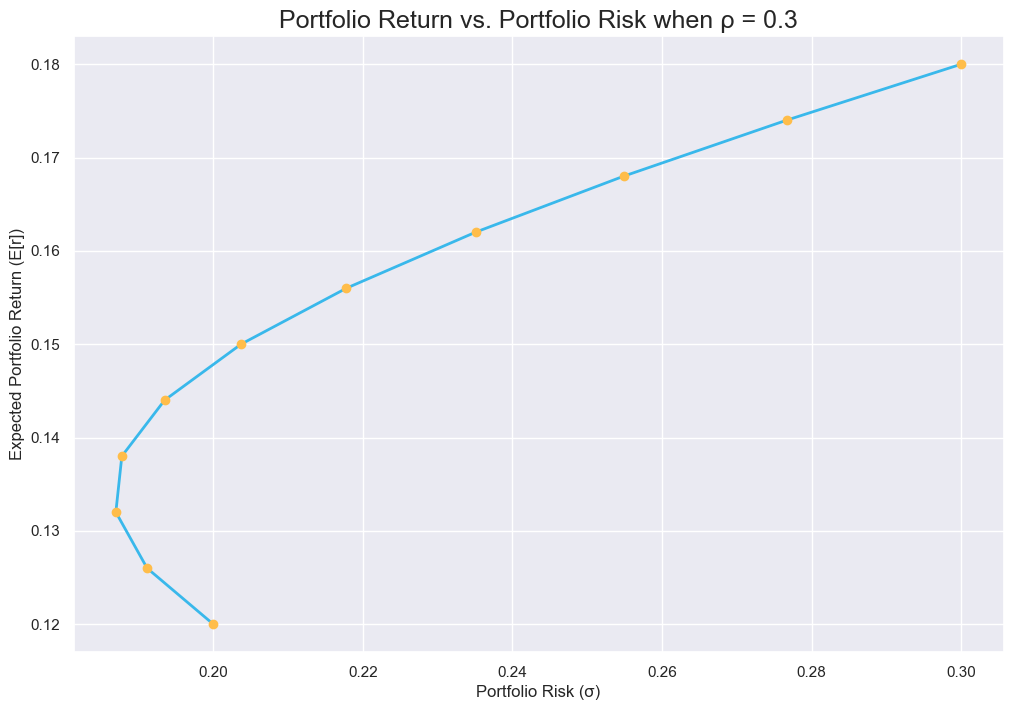

In [99]:
plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=.3)

# Correlations

In [100]:
# Import packages
import pandas as pd
import numpy as np

In [101]:
df = pd.read_csv('C:/Users/Anna Mae Gaor/Desktop/PROJECTS/Portfolio Management/Codes/data/15stocks_price.csv')  # stock price data

# Convert dates to timestamps and set date column as the index
df.set_index('date_gsheets', inplace=True)

# Calculate returns for all securities
returns_df = df.pct_change(1)

# Drop / delete missing observations
returns_df.dropna(inplace=True)

In [102]:
# Estimate the correlations across all securities
corr_matrix = returns_df.corr().round(2)

In [103]:
corr_matrix

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
AAPL,1.00,0.21,0.12,0.31,0.27,0.26,0.17,0.17,0.26,0.20,0.35,0.26,0.33,0.25,0.30
KO,0.21,1.00,0.09,0.47,0.37,0.32,0.37,0.31,0.35,0.14,0.36,0.23,0.32,0.41,0.33
NFLX,0.12,0.09,1.00,0.19,0.15,0.12,0.04,0.10,0.16,0.23,0.25,0.30,0.21,0.15,0.22
BRK.B,0.31,0.47,0.19,1.00,0.54,0.48,0.42,0.33,0.55,0.22,0.53,0.33,0.43,0.42,0.50
DIS,0.27,0.37,0.15,0.54,1.00,0.34,0.34,0.27,0.43,0.23,0.43,0.31,0.35,0.33,0.41
IBM,0.26,0.32,0.12,0.48,0.34,1.00,0.30,0.23,0.43,0.18,0.38,0.23,0.39,0.30,0.36
VZ,0.17,0.37,0.04,0.42,0.34,0.30,1.00,0.29,0.37,0.11,0.28,0.17,0.29,0.31,0.27
WMT,0.17,0.31,0.10,0.33,0.27,0.23,0.29,1.00,0.24,0.11,0.25,0.14,0.22,0.23,0.25
GE,0.26,0.35,0.16,0.55,0.43,0.43,0.37,0.24,1.00,0.19,0.40,0.26,0.34,0.33,0.38
TSLA,0.20,0.14,0.23,0.22,0.23,0.18,0.11,0.11,0.19,1.00,0.27,0.26,0.21,0.18,0.23


In [104]:
# Explore the correlations of Netflix and Tesla with all other securities
corr_matrix[['NFLX', 'TSLA']]

,NFLX,TSLA
AAPL,0.12,0.20
KO,0.09,0.14
NFLX,1.00,0.23
BRK.B,0.19,0.22
DIS,0.15,0.23
IBM,0.12,0.18
VZ,0.04,0.11
WMT,0.10,0.11
GE,0.16,0.19
TSLA,0.23,1.00


In [105]:
# Explore the correlations of Apple, Mastercard, and Microsoft with all other securities
corr_matrix[['AAPL', 'MA', 'MSFT']]

,AAPL,MA,MSFT
AAPL,1.00,0.35,0.33
KO,0.21,0.36,0.32
NFLX,0.12,0.25,0.21
BRK.B,0.31,0.53,0.43
DIS,0.27,0.43,0.35
IBM,0.26,0.38,0.39
VZ,0.17,0.28,0.29
WMT,0.17,0.25,0.22
GE,0.26,0.40,0.34
TSLA,0.20,0.27,0.21


In [106]:
# Explore the correlations of Coca Cola and Berkshire Hathaway with all other securities
corr_matrix[['KO', 'BRK.B']]

,KO,BRK.B
AAPL,0.21,0.31
KO,1.00,0.47
NFLX,0.09,0.19
BRK.B,0.47,1.00
DIS,0.37,0.54
IBM,0.32,0.48
VZ,0.37,0.42
WMT,0.31,0.33
GE,0.35,0.55
TSLA,0.14,0.22


In [107]:
returns_df

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA,MA,AMZN,MSFT,UN,V
date_gsheets,,,,,,,,,,,,,,,
01/04/2012 16:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177,-0.032845,-0.008490,0.023534,-0.013459,-0.017864
01/05/2012 16:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292,-0.010946,0.000563,0.010219,0.001161,0.007513
01/06/2012 16:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743,-0.026958,0.028152,0.015535,-0.035373,-0.011774
01/09/2012 16:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635,0.008457,-0.022178,-0.013163,0.013526,-0.007943
01/10/2012 16:00,0.003485,0.005802,-0.024234,0.014812,-0.003019,-0.001542,0.005212,-0.002366,-0.007423,0.013578,0.008676,0.004368,0.003605,0.005635,-0.001201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/22/2017 16:00:00,0.000000,-0.000219,0.006998,-0.004877,-0.008214,0.006601,0.003396,0.001530,0.001717,-0.019478,0.002126,-0.005448,0.000117,0.001599,0.002491
12/26/2017 16:00:00,-0.025370,0.004826,-0.011477,-0.001768,-0.005061,0.002164,0.000564,0.009673,-0.004000,-0.024323,0.002851,0.007190,-0.001286,0.002661,0.002662
12/27/2017 16:00:00,0.000176,0.002620,-0.008095,0.005669,-0.004440,0.001963,0.001127,0.001008,-0.002869,-0.017807,0.000793,0.004674,0.003630,-0.001415,0.009116
